data collection: 

In [200]:
import yfinance as yf

def get_data(symbol):
    stock = yf.Ticker(symbol)
    data = stock.history(period="10y")
    return data
def get_data2(symbol):
    stock = yf.Ticker(symbol)
    data = stock.history(period="1mo")
    return data
def get_data3(symbol):
    stock = yf.Ticker(symbol)
    data = stock.history(period="30mo")
    return data

linear regression: (daily)

In [201]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np

def regression_analysis(data):
    data['Day'] = range(1, len(data) + 1)

    X = data['Day'].values.reshape(-1, 1)
    y = data['Close'].values.reshape(-1, 1)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    regressor = LinearRegression()
    regressor.fit(X_train, y_train)

    plt.scatter(X, y, color='blue')
    plt.plot(X, regressor.predict(X), color='red')
    plt.title('Stock Price vs Time (Train set)')
    plt.xlabel('Time (days)')
    plt.ylabel('Stock Price')
    plt.show()

    y_pred = regressor.predict(X_test)
    mse = metrics.mean_squared_error(y_test, y_pred)
    print("Mean Squared Error:", mse)

    return regressor




In [202]:
def predict_and_adjust_next_5_days(regressor, data):
    # Predicting the next 5 days
    next_5_days = np.array(range(len(data) + 1, len(data) + 6)).reshape(-1, 1)
    predicted_prices = regressor.predict(next_5_days)

    # Generate random risk values for each day
    risks = np.random.rand(5)
    affect = np.random.randint(50)
    adjusted_predicted_prices = predicted_prices.flatten() - (0.5 - risks) * affect  
    # Plotting the existing data
    plt.scatter(data['Day'], data['Close'], color='green')
    plt.plot(data['Day'], regressor.predict(data['Day'].values.reshape(-1,1)), color='red')

    # Plotting the original predicted data
    plt.scatter(next_5_days.flatten(), predicted_prices.flatten(), color='blue', s=1)

    # Plotting the risk adjusted predicted data
    plt.scatter(next_5_days.flatten(), adjusted_predicted_prices, color='purple')

    plt.title('Stock Price vs Time')
    plt.xlabel('Time (days)')
    plt.ylabel('Stock Price')
    plt.legend(['Linear Regression', 'Historical data', 'Predicted data', 'Risk Adjusted data'])
    plt.show()

    return predicted_prices, adjusted_predicted_prices

markov chain applications: 

In [203]:
# import numpy as np
# import pandas as pd

# def markov_chain(data):
#     # Compute the daily returns
#     data['Returns'] = data['Close'].pct_change()

#     # Define the states
#     states = ['Gain', 'Loss']
#     data['State'] = pd.cut(data['Returns'], bins=[-np.inf, 0, np.inf], labels=states)

#     # Compute the transition matrix
#     transition_matrix = pd.crosstab(data['State'], data['State'], normalize='index').values
#     print('Transition matrix:')
#     print(transition_matrix)
#     return transition_matrix


This is the regression analysis of the past 10years of Tesla stock


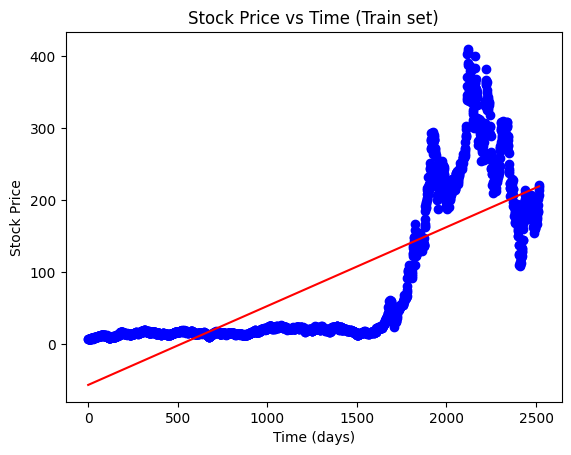

Mean Squared Error: 4182.644777829221
This is the prediction of the next 5 days based on the previous value, considering risks


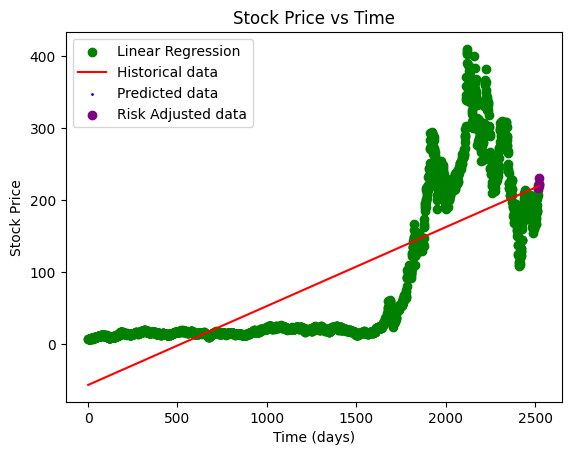

This is the regression analysis of the past 30 month of Tesla stock


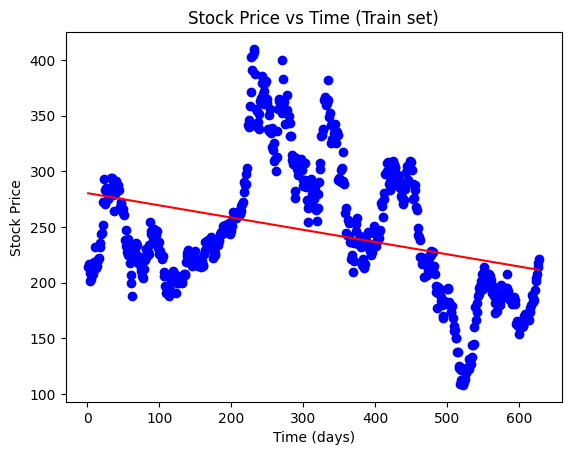

Mean Squared Error: 3037.8822520623617
This is the prediction of the next 5 days based on the previous value, considering risks


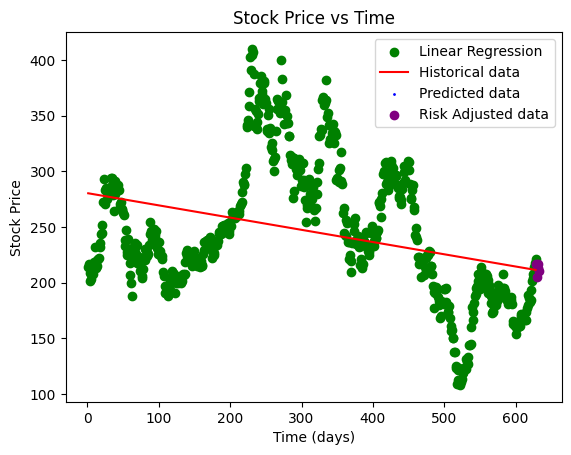

This is the regression analysis of the past 1 month of Tesla stock


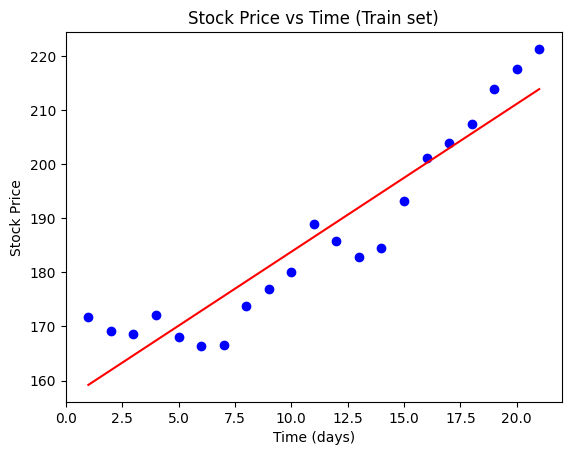

Mean Squared Error: 48.50854694176982
This is the prediction of the next five days based on the previous value, considering risks


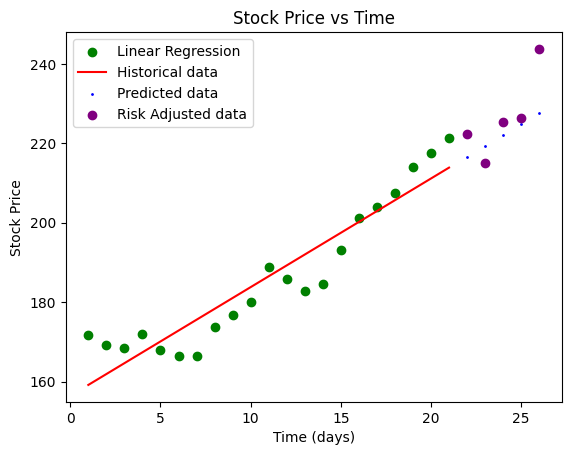

In [204]:
data = get_data("TSLA")
data2 = get_data2("TSLA")
data3 = get_data3("TSLA")
print("This is the regression analysis of the past 10years of Tesla stock")
regressor = regression_analysis(data)
print("This is the prediction of the next 5 days based on the previous value, considering risks")
predicted_prices, adjusted_predicted_prices = predict_and_adjust_next_5_days(regressor, data)
print("This is the regression analysis of the past 30 month of Tesla stock")
regressor3 = regression_analysis(data3)
print("This is the prediction of the next 5 days based on the previous value, considering risks")
predicted_prices3, adjusted_predicted_prices3 = predict_and_adjust_next_5_days(regressor3, data3)
print("This is the regression analysis of the past 1 month of Tesla stock")
regressor2 = regression_analysis(data2)
print("This is the prediction of the next five days based on the previous value, considering risks")
predicted_prices2, adjusted_predicted_prices2 = predict_and_adjust_next_5_days(regressor2, data2)

